<a href="https://colab.research.google.com/github/erthersany/Data-Analysis-Projects/blob/main/Logistic_Regression_Project_Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

## Importing the Dataset

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

## Perform the Data Analysis(DM, DE, DC, DV, EDA)

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [82]:
df.shape

(891, 12)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

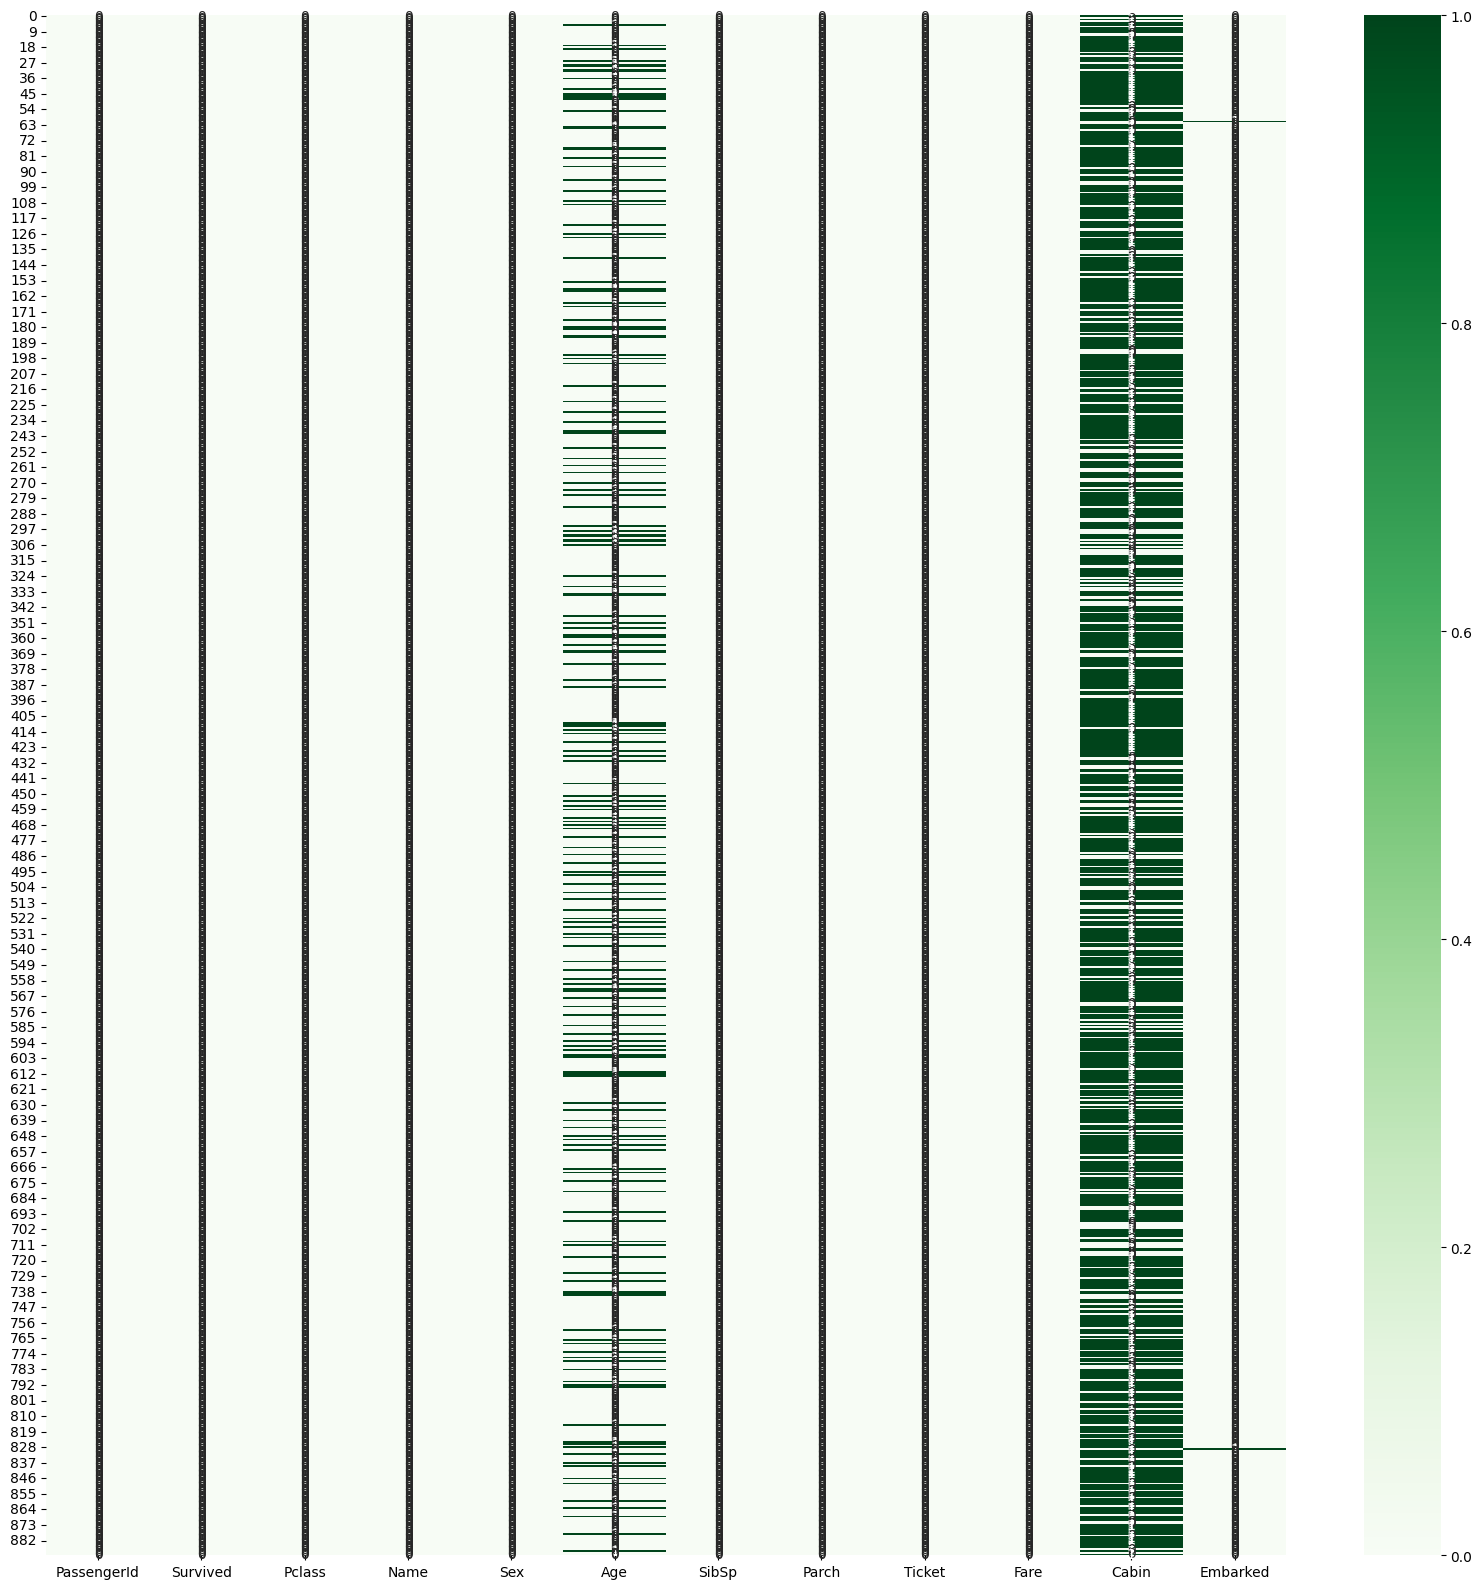

In [85]:
#creating heatmap of null values
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),annot=True, cmap='Greens')

In [86]:
# Age % of null values
(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [87]:
# Cabin % of null values
(df.Cabin.isnull().sum()/len(df.Cabin))*100

77.10437710437711

In [88]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
#drop the Cabin Feature
df.drop('Cabin', axis=1,inplace=True)

In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [92]:
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [93]:
# Show the datapoint where the Embarked is null
dm =df[df.Embarked.isnull()]

In [94]:
# Show all the Embarked value where the Pclass = 1
df[df.Pclass == 1].Embarked.value_counts()

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [95]:
# Show all the Embarked value where the Pclass = 2
df.loc[df.Pclass==2,"Embarked"].value_counts()

Embarked
S    164
C     17
Q      3
Name: count, dtype: int64

In [96]:
# Show all the Embarked value where the Pclass = 3
df.loc[df.Pclass==3,"Embarked"].value_counts()

Embarked
S    353
Q     72
C     66
Name: count, dtype: int64

In [97]:
# Show all the Embarked value where the Fare = 80.0
df.loc[df.Fare==80.0,'Embarked'].value_counts()

Series([], Name: count, dtype: int64)

In [98]:
# Show all the Embarked value where the Ticket = 113572
df.loc[df.Ticket=='113572','Embarked'].value_counts()

Series([], Name: count, dtype: int64)

In [99]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [100]:
# Mean of Age column
df.Age.mean()

29.69911764705882

In [101]:
# Median of Age column
df.Age.median()

28.0

In [102]:
# Mode of Age column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

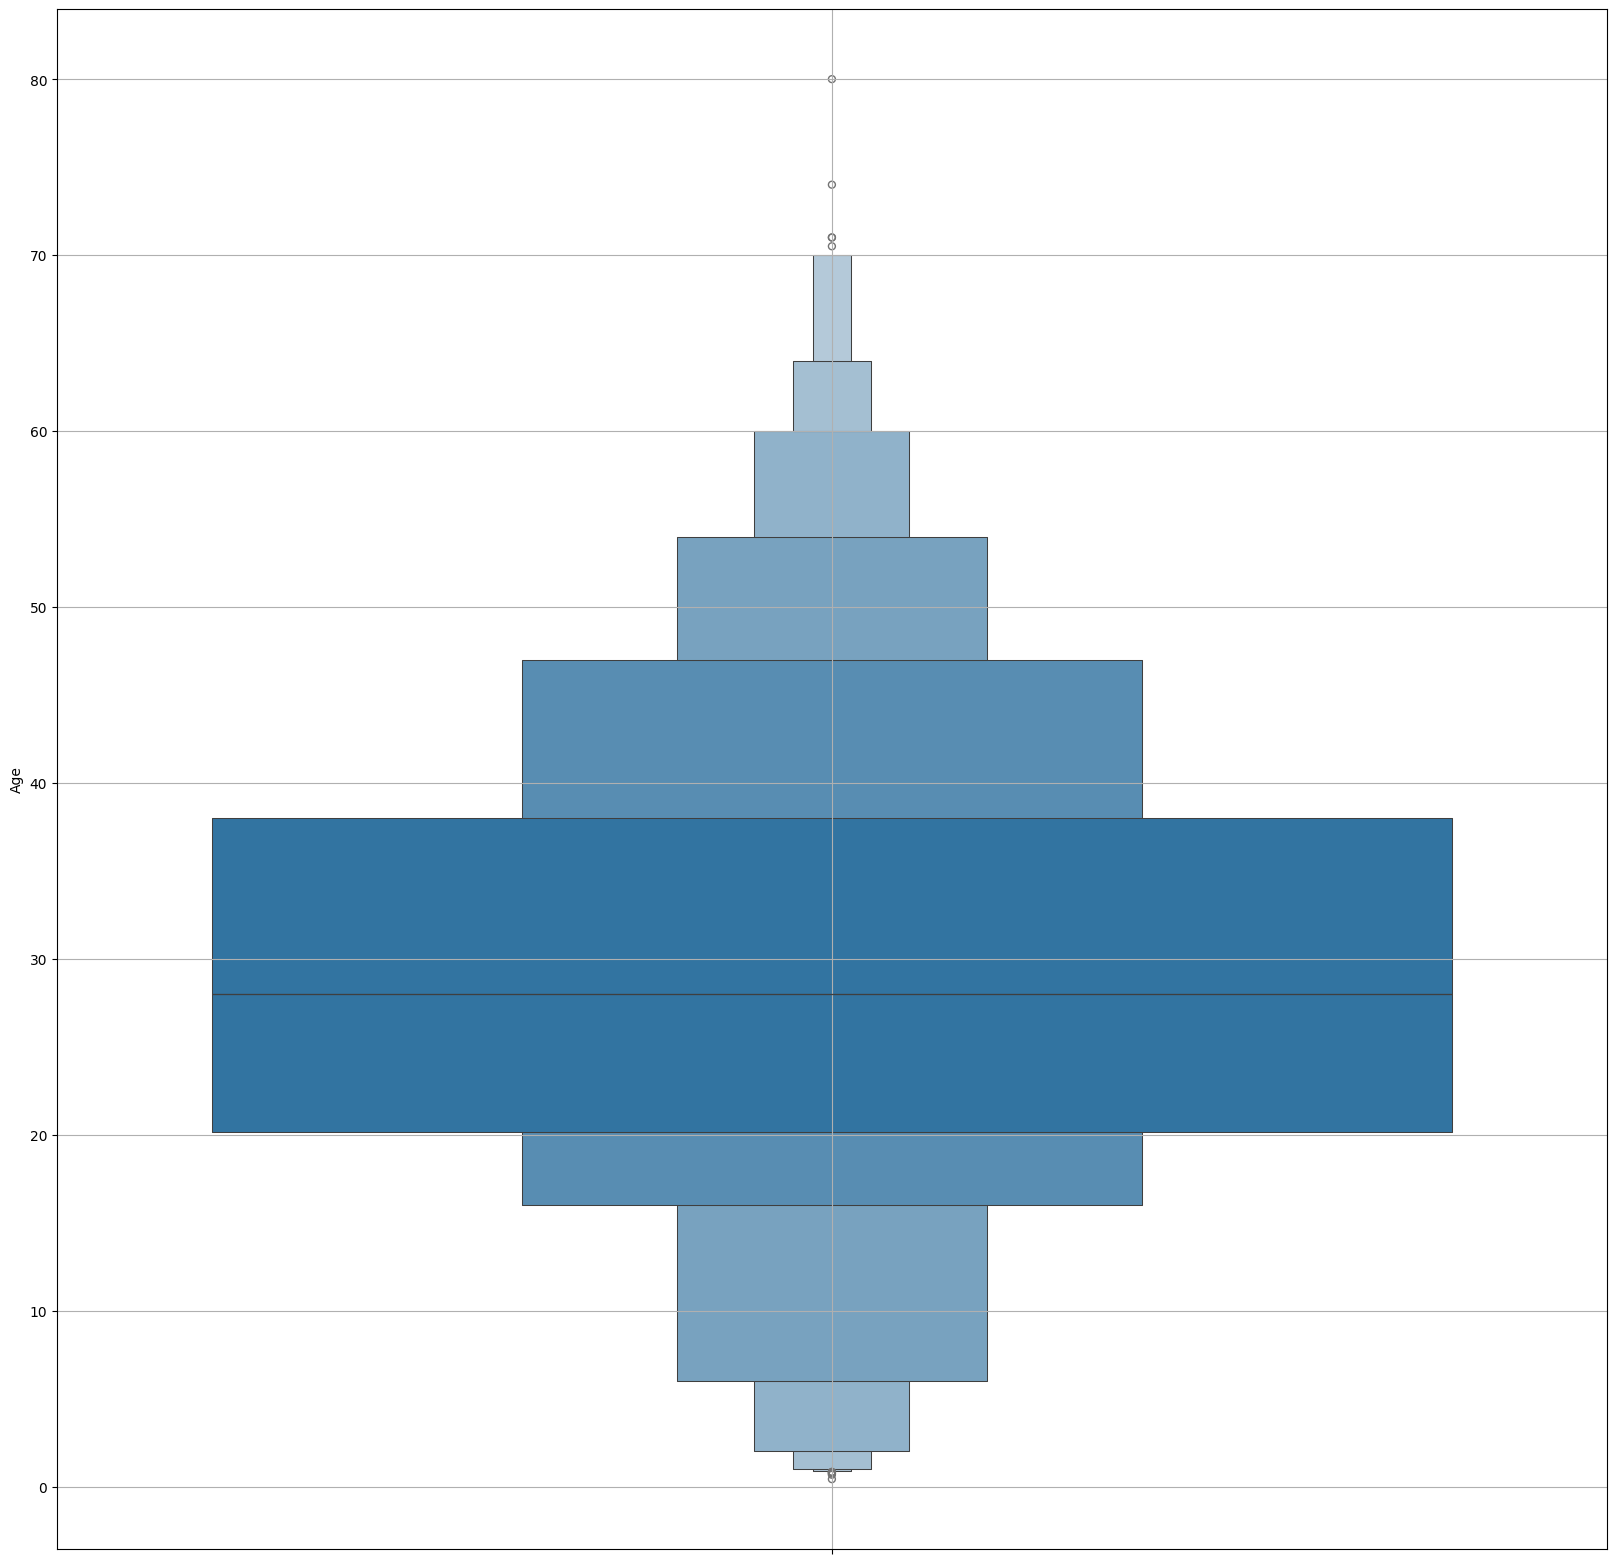

In [103]:
# Plot a boxpolot to find out the outliers in the Age columns
plt.figure(figsize=(20,20))
sns.boxenplot(df.Age)
plt.grid()

In [104]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [105]:
df.shape

(891, 11)

In [106]:
# Fill all the null values in the Age column with its median value
df.Age.fillna(df.Age.median(),inplace=True)

In [107]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [108]:
# Drop the rows where Embarked is Null
df.dropna(inplace=True)

In [109]:
df.shape

(889, 11)

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
# Drop off the columns - PassengerId, Name, Ticket
df.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [112]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


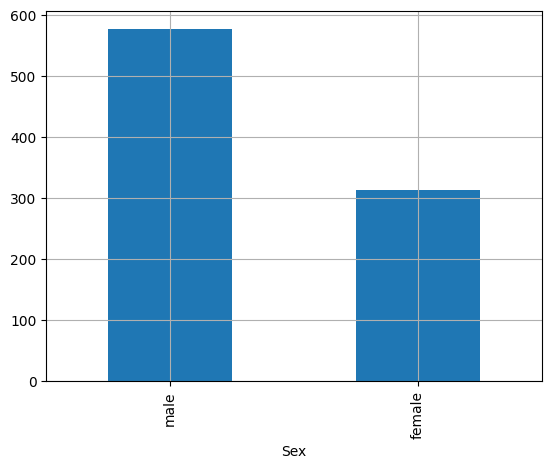

In [113]:
# Plot a graph : Strength of Male V/s Strength of Female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

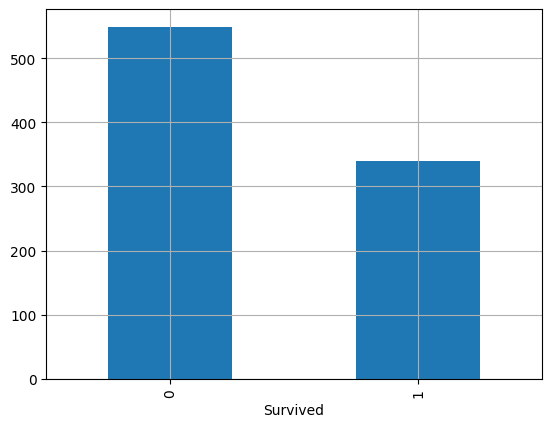

In [114]:
# Plot a graph : Strength of Survival V/s Strength of Non-survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

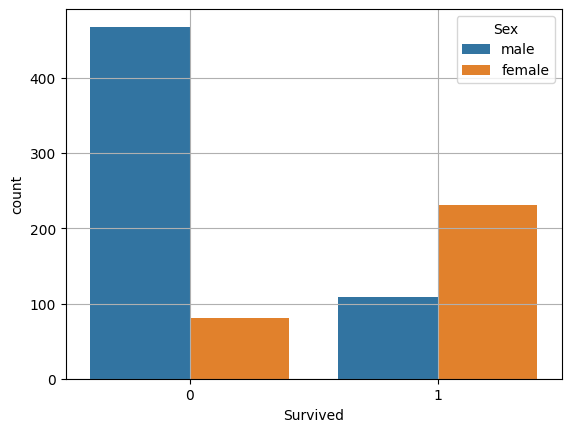

In [115]:
# Plot a graph to find out the survival & non-survival rate w.r.t. Sex
sns.countplot(x='Survived',data=df,hue='Sex')
plt.grid()

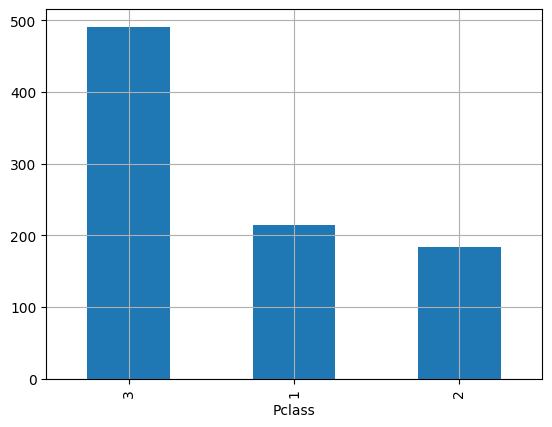

In [116]:
# Plot a graph to find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

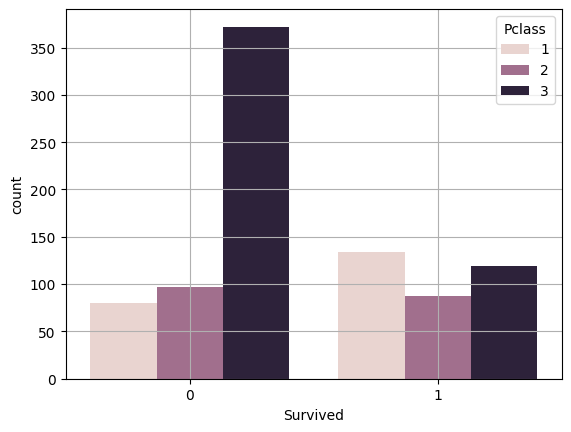

In [117]:
# Plot a graph to find out the survival & non-survival rate w.r.t. Pclass
sns.countplot(x='Survived',data=df,hue='Pclass')
plt.grid()

## ore EDA can be done - More plots, more graphs, more charts, more rate, percentages, etc.

In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [119]:
# Changing the Age dtype to 'int'
df.Age = df.Age.astype(int)

In [120]:
df.Fare = round(df.Fare,2)

##  Encoders - To convert the data from the categorical form to numerical form without changing its meaning

In [121]:
# Label encoding for the column Sex
from sklearn.preprocessing import LabelEncoder

In [122]:
enc = LabelEncoder()

In [123]:
df.Sex = enc.fit_transform(df.Sex)

In [124]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [125]:
# One Hot encoding for the column Embarked

In [126]:
new = df.copy()

In [127]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [128]:
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1)

In [129]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,False,False,True
1,1,1,0,38,1,0,71.28,C,True,False,False
2,1,3,0,26,0,0,7.92,S,False,False,True
3,1,1,0,35,1,0,53.10,S,False,False,True
4,0,3,1,35,0,0,8.05,S,False,False,True


In [130]:
df.drop(['Embarked', 'C'], axis=1, inplace=True)

In [131]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,False,True
1,1,1,0,38,1,0,71.28,False,False
2,1,3,0,26,0,0,7.92,False,True
3,1,1,0,35,1,0,53.10,False,True
4,0,3,1,35,0,0,8.05,False,True


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    bool   
 8   S         889 non-null    bool   
dtypes: bool(2), float64(1), int64(6)
memory usage: 57.3 KB


<Axes: >

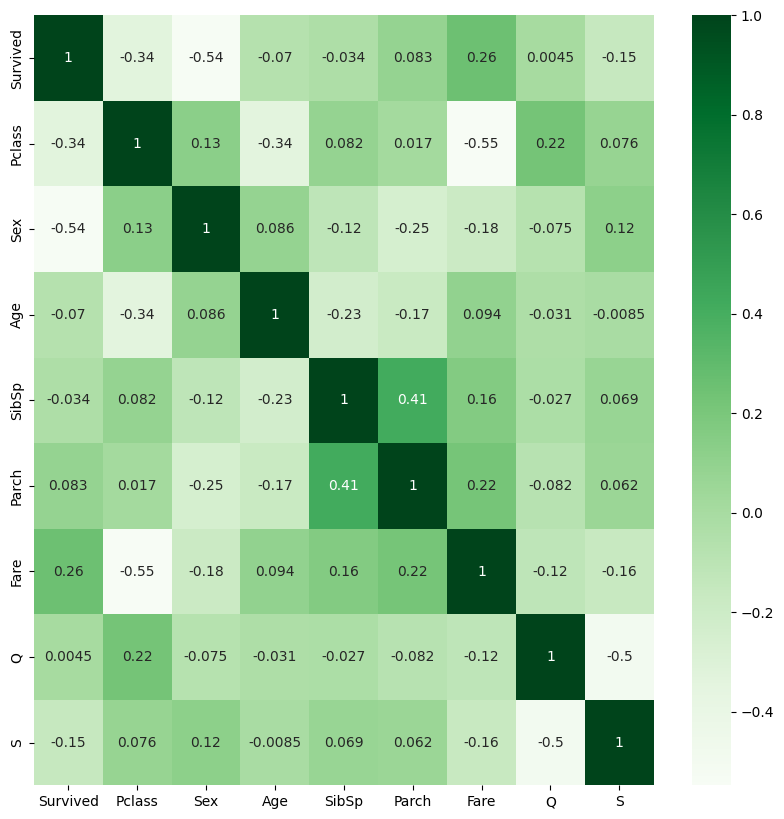

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

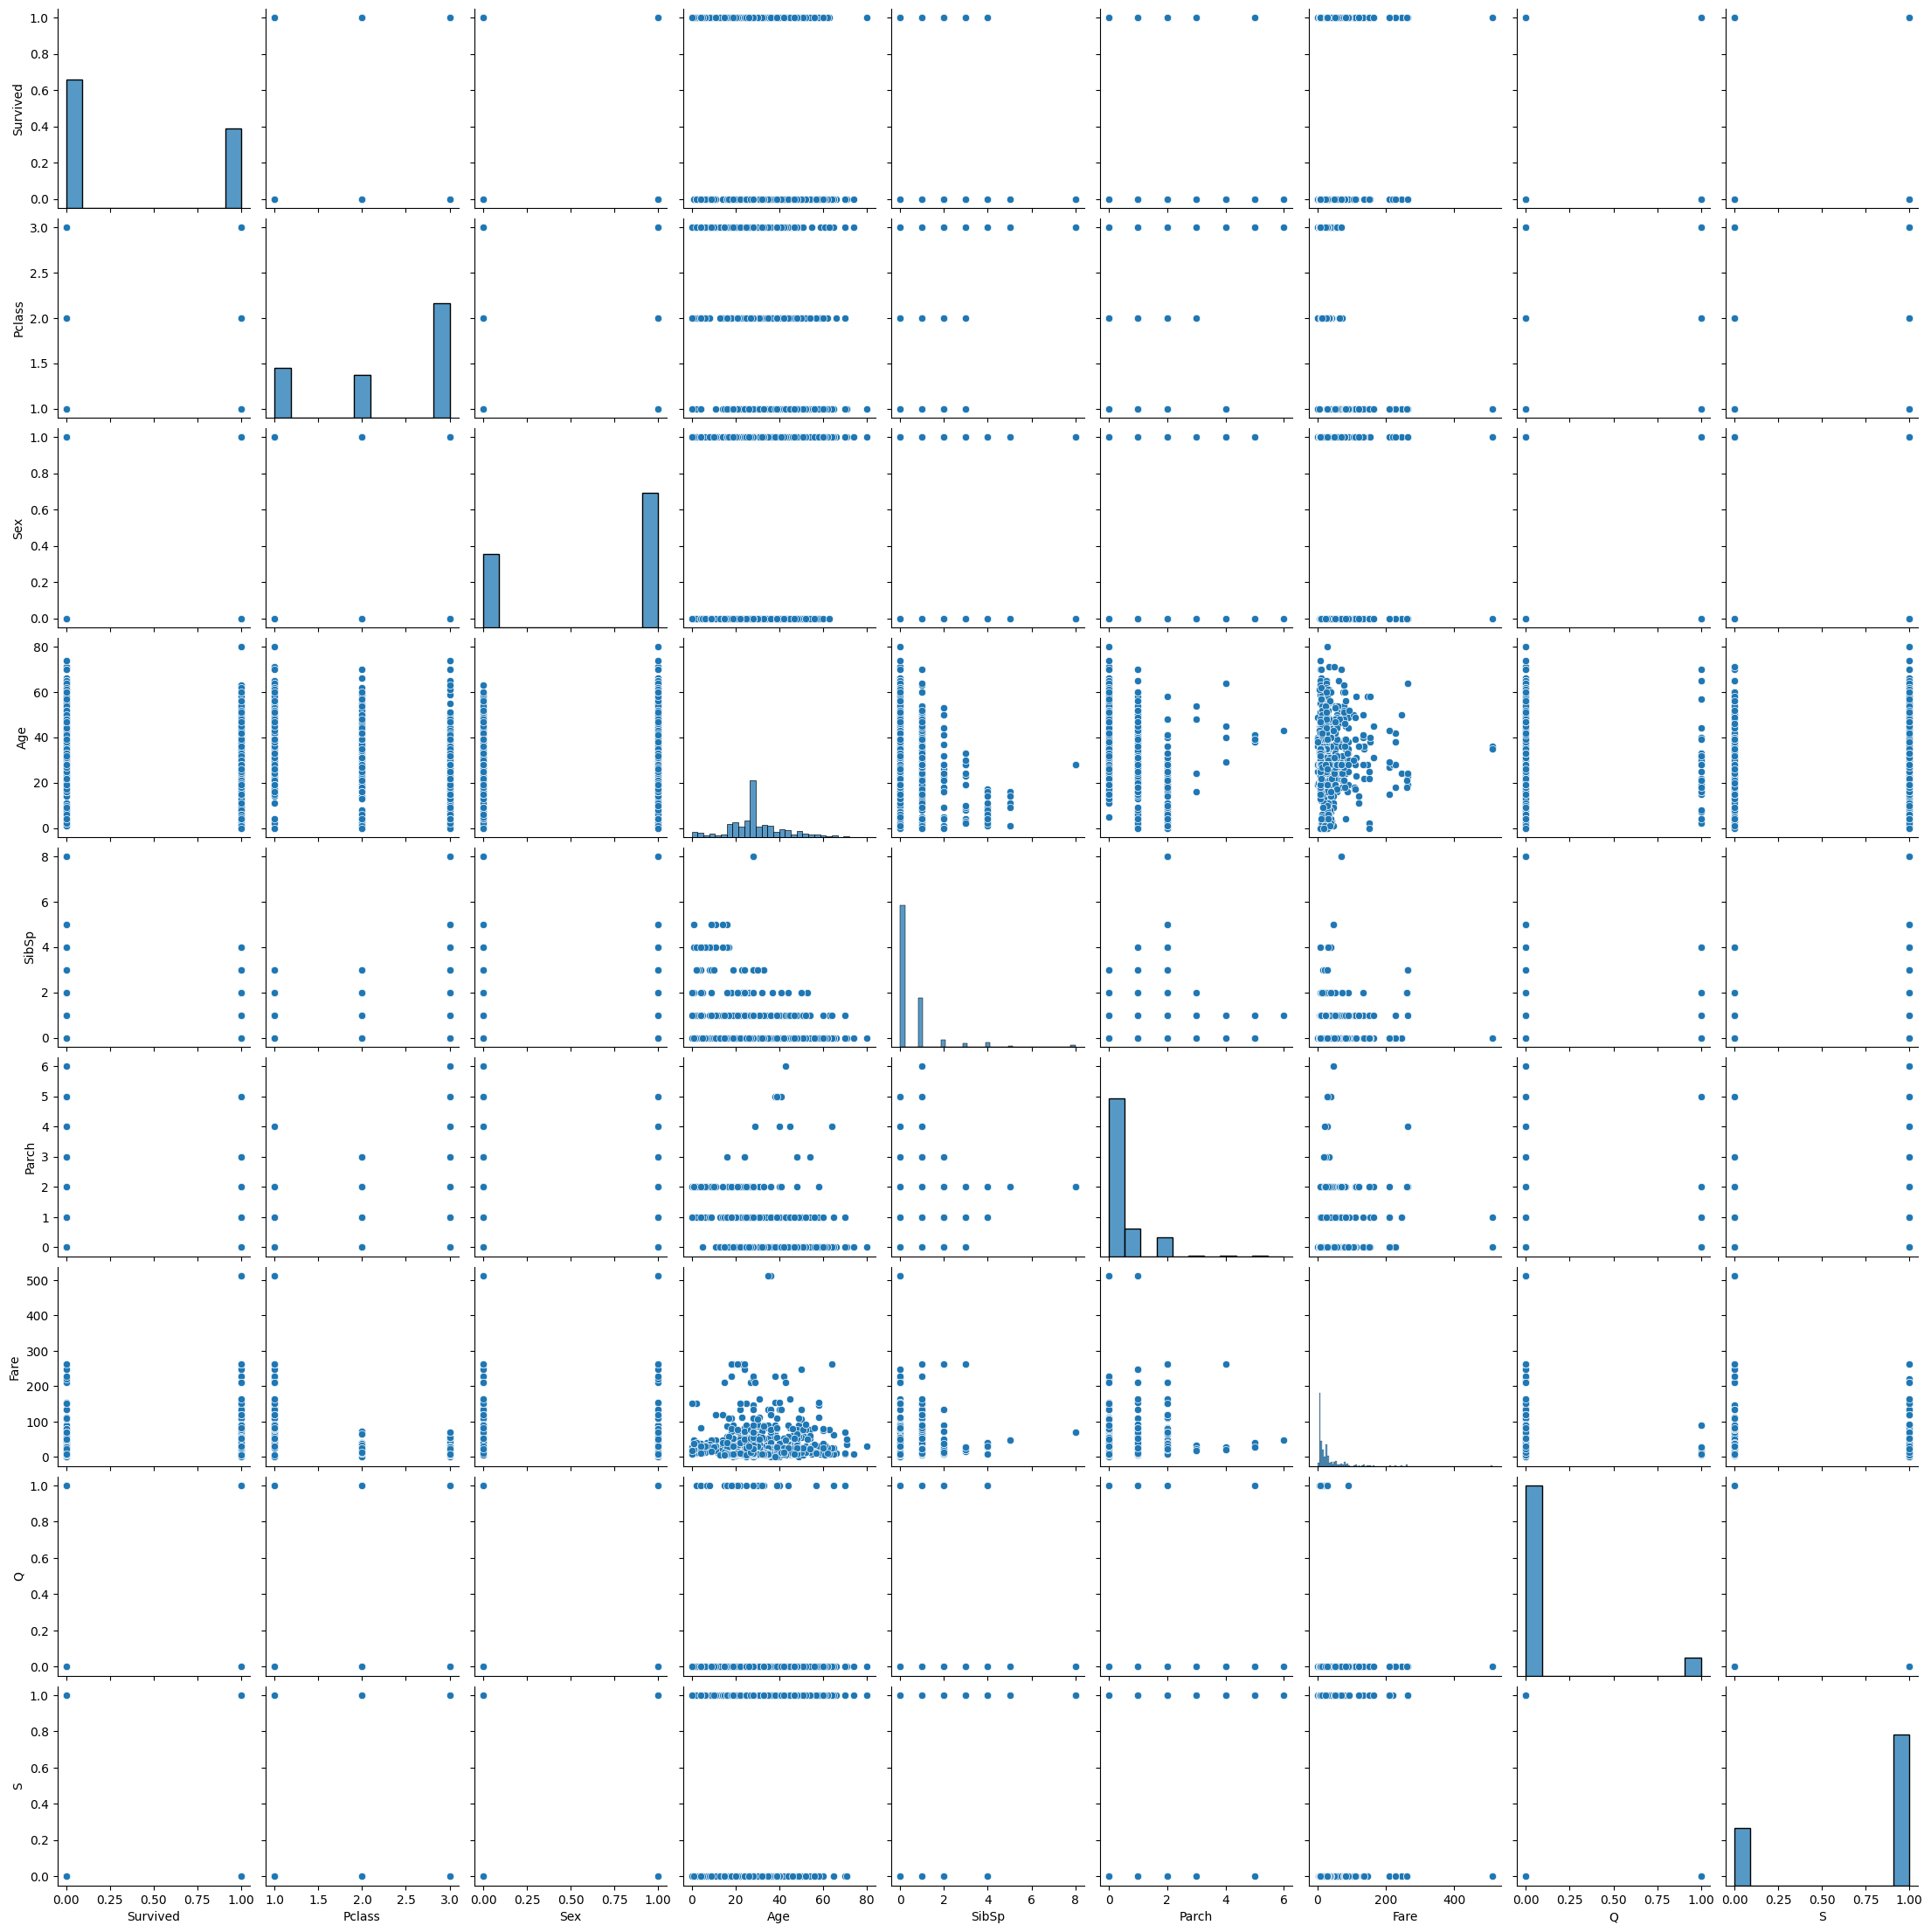

In [134]:
sns.pairplot(df)

##  Feature Importance / Feature Selection

In [135]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,False,True
1,1,1,0,38,1,0,71.28,False,False
2,1,3,0,26,0,0,7.92,False,True
3,1,1,0,35,1,0,53.10,False,True
4,0,3,1,35,0,0,8.05,False,True


In [136]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [137]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,False,True
1,1,0,38,1,0,71.28,False,False
2,3,0,26,0,0,7.92,False,True
3,1,0,35,1,0,53.10,False,True
4,3,1,35,0,0,8.05,False,True
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,False,True
887,1,0,19,0,0,30.00,False,True
888,3,0,28,1,2,23.45,False,True
889,1,1,26,0,0,30.00,False,False


In [139]:
from sklearn.ensemble import ExtraTreesClassifier

In [140]:
feat = ExtraTreesClassifier()

In [141]:
feat.fit(x,y)

ExtraTreesClassifier()

In [142]:
feat.feature_importances_

array([0.10774855, 0.28639487, 0.24107597, 0.04440097, 0.04540409,
       0.24462845, 0.00808911, 0.022258  ])

<Axes: >

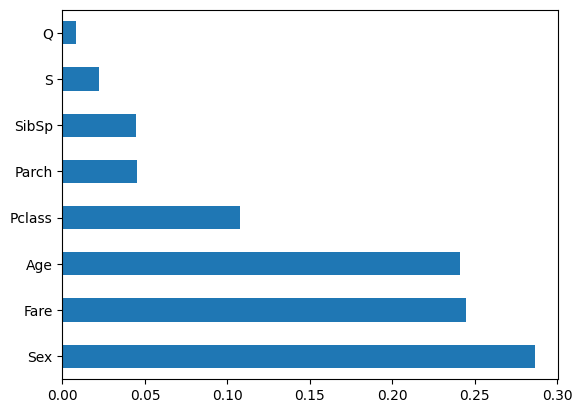

In [145]:
feat_imp = pd.Series(feat.feature_importances_, index=x.columns)
feat_imp.nlargest(8).plot(kind='barh')

## Splitting the Data

In [146]:
skf = StratifiedKFold(n_splits=5)

In [147]:
for train_index, test_index in skf.split(x,y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [148]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
714    0
715    0
718    0
719    0
721    0
Name: Survived, Length: 712, dtype: int64

In [149]:
y_test

706    1
707    1
708    1
709    1
710    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 177, dtype: int64

## Model Selection

In [150]:
classifier = LogisticRegression()

## Training the model

In [151]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Test the model

In [153]:
y_pred = classifier.predict(x_test)

## EDA

In [154]:
final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [155]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

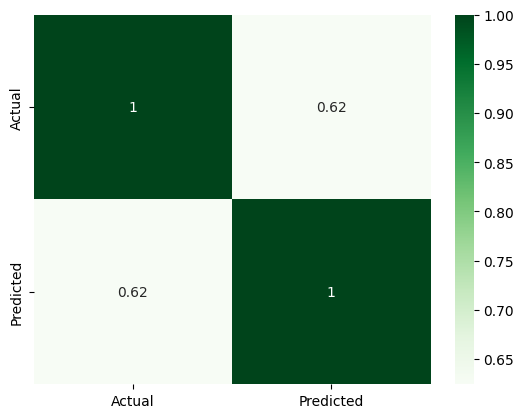

In [156]:
sns.heatmap(final.corr(), annot=True, cmap='Greens')

##  Performance Metric - Confusion Matrix

In [157]:
confusion_matrix(y_test,y_pred)

array([[98, 11],
       [20, 48]])

In [164]:
accuracy = (98+48)/Total
 = 146/177 = 0.824

In [159]:
from sklearn.metrics import accuracy_score

In [161]:
accuracy_score(y_test,y_pred)

0.8248587570621468

In [162]:
from sklearn.metrics import classification_report

In [163]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

##  Exportation of model & dataset
Module - Pickle

Serialisation - Deserialisation
Dumping - Undumping

Pickling - Unpickling

In [165]:
import pickle

In [166]:
pick = pickle.dumps(classifier)

In [168]:
unpickle = pickle.load(pick)